In [1]:
import numpy as np
import pandas as pd

In [2]:
import random

In [3]:
np.random.seed(42)
n= 1000
w = np.random.normal(loc=np.random.randint(0,100),scale=np.random.randint(0,100),size=n).round()
x = np.random.normal(loc=np.random.randint(0,100),scale=np.random.randint(0,100),size=n).round()
o_b0 = np.random.randn(1)
o_b1 = np.random.randn(1)
o_b2 = np.random.randn(1)
y= np.random.normal(o_b0 + o_b1 * w + o_b2 * x,5)
df_filled = pd.DataFrame({'w': w, 'x': x, 'y': y})

In [4]:
df_filled[['w', 'x']] = df_filled[['w', 'x']].apply(pd.to_numeric, errors='coerce')
df_filled['y'] = pd.to_numeric(df_filled['y'], errors='coerce')

X = df_filled[['w', 'x']]
y = df_filled['y']

train_size = int(0.8 * len(X))


x_train, x_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [5]:
def mean(inputs):
    return sum(inputs)/len(inputs)


def variance(inputs, mean):
    return sum((x - mean)**2 for x in inputs)


def covariance(x, mean_x, y, mean_y):
    covar = 0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

def coefficients(inputs, y):
    mean_x = [mean(feature) for feature in inputs]
    mean_y = mean(y)

    covars = [covariance(inputs[i], mean_x[i], y, mean_y) for i in range(len(inputs))]
    variances = [variance(inputs[i], mean_x[i]) for i in range(len(inputs))]

    coeffs = [covars[i] / variances[i] for i in range(len(inputs))]

    b0 = mean_y - sum(coeffs[i] * mean_x[i] for i in range(len(inputs)))
    
    return [b0] + coeffs

def multiple_linear_regression(train_inputs, train_y, test_inputs):
    predictions = []
    coeffs = []
    coefficients_list = coefficients(train_inputs, train_y)

    for i in range(len(test_inputs[0])):
        y_pred = coefficients_list[0]
        for j in range(len(test_inputs)):
            y_pred += coefficients_list[j + 1] * test_inputs[j][i]
        predictions.append(y_pred)

    coeffs.extend(coefficients_list)

    return predictions, coeffs

In [6]:
def cost_function(predictions, y):
    return sum((predictions[i] - y[i])**2 for i in range(len(y))) / len(y)


def gradient_function(predictions, y, inputs):
    gradients = []
    n = len(y)

    gradients.append(sum(predictions[i] - y[i] for i in range(n)) / n)

    for j in range(len(inputs)):
        gradients.append(sum((predictions[i] - y[i]) * inputs[j][i] for i in range(n)) / n)
    return gradients


def gradient_descent(train_inputs, train_y, test_inputs, alpha=0.1, iterations=10):

    coeffs = [random.random() for _ in range(len(train_inputs) + 1)]

    for _ in range(iterations):

        predictions = multiple_linear_regression(train_inputs, train_y, test_inputs)[0]

        cost = cost_function(predictions, train_y)

        gradients = gradient_function(predictions, train_y, train_inputs)

        coeffs = [coeffs[i] - alpha * gradients[i] for i in range(len(coeffs))]
        
        print("Iteration: ", _)
        print("-------")
        print(coeffs)
        print("--------")

    return  predictions,coeffs


In [7]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(actual, predicted):

    mean_actual = sum(actual) / len(actual)


    total_sum_squares = sum((actual_i - mean_actual)**2 for actual_i in actual)


    residual_sum_squares = sum((actual_i - predicted_i)**2 for actual_i, predicted_i in zip(actual, predicted))


    r_squared = 1 - (residual_sum_squares / total_sum_squares)

    return r_squared



In [8]:
train_predictions, train_coeffs = gradient_descent(x_train.values.T, y_train, x_train.values.T.tolist())

Iteration:  0
-------
[0.1274852581937155, 20.897244439271486, -14.790480677567272]
--------
Iteration:  1
-------
[0.12748525819371376, 41.38927288191376, -30.294761214908505]
--------
Iteration:  2
-------
[0.127485258193712, 61.881301324556034, -45.799041752249735]
--------
Iteration:  3
-------
[0.12748525819371026, 82.37332976719831, -61.303322289590966]
--------
Iteration:  4
-------
[0.1274852581937085, 102.8653582098406, -76.8076028269322]
--------
Iteration:  5
-------
[0.12748525819370676, 123.35738665248287, -92.31188336427343]
--------
Iteration:  6
-------
[0.12748525819370501, 143.84941509512515, -107.81616390161466]
--------
Iteration:  7
-------
[0.12748525819370327, 164.34144353776742, -123.32044443895589]
--------
Iteration:  8
-------
[0.12748525819370152, 184.83347198040968, -138.82472497629712]
--------
Iteration:  9
-------
[0.12748525819369977, 205.32550042305195, -154.32900551363835]
--------


In [9]:
test_predictions, test_coeffs = gradient_descent(x_test.values.T.tolist(), y_test.tolist(), x_test.values.T.tolist())


Iteration:  0
-------
[0.14596678501128704, 43.03329481207686, -29.981276391564766]
--------
Iteration:  1
-------
[0.1459667850112895, 85.45260127856434, -60.47671150502846]
--------
Iteration:  2
-------
[0.14596678501129198, 127.87190774505183, -90.97214661849216]
--------
Iteration:  3
-------
[0.14596678501129445, 170.2912142115393, -121.46758173195586]
--------
Iteration:  4
-------
[0.14596678501129692, 212.7105206780268, -151.96301684541956]
--------
Iteration:  5
-------
[0.1459667850112994, 255.12982714451428, -182.45845195888324]
--------
Iteration:  6
-------
[0.14596678501130186, 297.54913361100176, -212.95388707234696]
--------
Iteration:  7
-------
[0.14596678501130433, 339.9684400774893, -243.44932218581067]
--------
Iteration:  8
-------
[0.1459667850113068, 382.3877465439768, -273.9447572992744]
--------
Iteration:  9
-------
[0.14596678501130927, 424.8070530104643, -304.4401924127381]
--------


In [10]:
train_coeffs

[0.12748525819369977, 205.32550042305195, -154.32900551363835]

In [11]:
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = root_mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = root_mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)


print("Training Set Metrics:")
print(f'Train Mean Absolute Error (MAE): {train_mae:.2f}')
print(f'Train Mean Squared Error (MSE): {train_mse:.2f}')
print(f'Train Root Mean Squared Error (RMSE): {train_rmse:.2f}')
print(f'Train R-squared : {train_r2:.2f}')


print("\nTest Set Metrics:")
print(f'Test Mean Absolute Error (MAE): {test_mae:.2f}')
print(f'Test Mean Squared Error (MSE): {test_mse:.2f}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse:.2f}')
print(f'Test R-squared : {test_r2:.2f}')


Training Set Metrics:
Train Mean Absolute Error (MAE): 5.31
Train Mean Squared Error (MSE): 45.26
Train Root Mean Squared Error (RMSE): 6.73
Train R-squared : 0.99

Test Set Metrics:
Test Mean Absolute Error (MAE): 7.94
Test Mean Squared Error (MSE): 97.03
Test Root Mean Squared Error (RMSE): 9.85
Test R-squared : 0.98


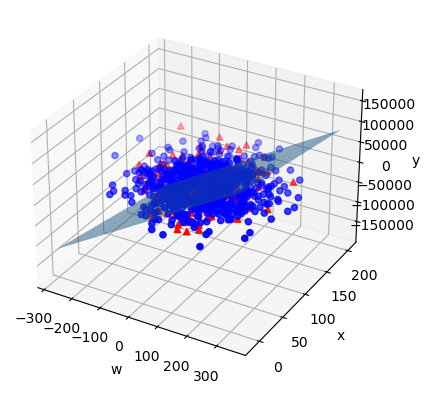

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train['w'], x_train['x'], y_train, c='b', marker='o')

ax.scatter(x_test['w'], x_test['x'], y_test, c='r', marker='^')

b0, b1, b2 = test_coeffs

x_surf, y_surf = np.meshgrid(np.linspace(x_train['w'].min(), x_train['w'].max(), 10), np.linspace(x_train['x'].min(), x_train['x'].max(), 10))

z_surf = b0 + b1*x_surf + b2*y_surf

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5)

ax.set_xlabel('w')
ax.set_ylabel('x')
ax.set_zlabel('y')

plt.show()


In [13]:
df = pd.read_csv("multiLinearRawData.csv")

In [14]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,target
0,1.428744,2.987462,-2.023622,-0.966609,-1.903629,-0.688864,0.792542,1.561240,0.212631,-0.778668,153.082689
1,0.310016,-0.224040,1.195643,1.158392,1.001268,1.194667,-1.892253,-0.423820,0.029562,-1.006440,-86.698525
2,0.611837,-0.514951,-0.310912,0.213967,1.855854,2.022509,-0.044589,-0.009733,0.145256,-0.199422,71.701984
3,0.282772,0.545705,0.747309,0.753587,1.196701,0.309231,1.224890,-1.869518,0.415567,0.059505,-152.923017
4,0.695261,-1.784199,1.225631,0.951836,1.679710,-0.026194,-1.461071,0.478845,-0.576925,-1.111421,98.462193
...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.996030,0.907292,-0.097085,-0.446041,0.019869,-0.119548,0.249322,-0.704663,0.426275,0.204275,-92.741390
999996,0.522342,1.157119,-1.381412,-0.030129,0.039171,-0.894730,0.020618,0.555432,-0.828238,-0.526572,-39.581176
999997,-0.361210,-0.156456,-0.557518,-1.326509,1.402831,0.341920,-0.073948,-0.658589,0.337741,-0.843171,-22.349067
999998,-0.303780,1.332525,1.745086,-0.023541,-0.076534,0.064938,1.142583,1.035083,1.162821,-0.310953,-19.893591


In [15]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,target
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,-0.001668,-0.000480,0.000128,0.000536,0.001076,0.000258,0.002412,0.001310,-0.000490,-0.001377,0.036989
std,1.000045,0.999698,0.999288,0.999401,0.999922,0.999813,1.000261,1.000486,1.000775,1.001524,100.157297
min,-5.068317,-5.076522,-4.813597,-4.654419,-4.818244,-4.790921,-4.841312,-4.502650,-4.773874,-4.761268,-494.781682
25%,-0.676116,-0.675665,-0.675257,-0.674109,-0.673969,-0.674839,-0.672694,-0.674416,-0.675763,-0.676451,-67.530426
50%,-0.001333,-0.001196,0.000650,0.001221,0.000323,0.000836,0.001382,0.000847,-0.001124,-0.001947,0.090522
75%,0.672908,0.675485,0.675209,0.674661,0.675758,0.674480,0.678314,0.675136,0.674355,0.672437,67.599706
max,4.908611,4.631229,4.682719,5.435453,4.881705,4.653393,4.686896,4.694755,4.765526,4.685550,455.835992


In [16]:
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
target       0
dtype: int64

In [17]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]


train_size = int(0.8 * len(X))


x_train, x_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [18]:
# Train
train_predictions, train_coeffs = gradient_descent(x_train.values.T.tolist(), y_train.tolist(), x_train.values.T.tolist())

# Test
test_predictions, test_coeffs = gradient_descent(x_test.values.T.tolist(), y_test.tolist(), x_test.values.T.tolist())


Iteration:  0
-------
[0.7073084531483099, 0.25057351317815524, 0.4591927161761481, 0.6066509721172054, 0.6405975255413742, 0.9138463073061363, 0.8066325444486584, 0.2075819025754858, 0.8472258690525099, 0.3183702301330119, 0.13050788567469948]
--------
Iteration:  1
-------
[0.7073084531483095, 0.27371042513502175, 0.4569368121653936, 0.6002919324123182, 0.6349889633935362, 0.9273523031841698, 0.8203328184135132, 0.19267249590240365, 0.847065632342752, 0.32616206000795045, 0.13570160955624083]
--------
Iteration:  2
-------
[0.707308453148309, 0.29684733709188826, 0.45468090815463913, 0.5939328927074309, 0.6293804012456982, 0.9408582990622034, 0.8340330923783681, 0.1777630892293215, 0.8469053956329942, 0.333953889882889, 0.14089533343778218]
--------
Iteration:  3
-------
[0.7073084531483086, 0.3199842490487548, 0.45242500414388465, 0.5875738530025436, 0.6237718390978602, 0.954364294940237, 0.8477333663432229, 0.16285368255623933, 0.8467451589232363, 0.3417457197578275, 0.146089057319

In [19]:
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = root_mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = root_mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)


print("Training Set Metrics:")
print(f'Train Mean Absolute Error (MAE): {train_mae:.2f}')
print(f'Train Mean Squared Error (MSE): {train_mse:.2f}')
print(f'Train Root Mean Squared Error (RMSE): {train_rmse:.2f}')
print(f'Train R-squared : {train_r2:.2f}')


print("\nTest Set Metrics:")
print(f'Test Mean Absolute Error (MAE): {test_mae:.2f}')
print(f'Test Mean Squared Error (MSE): {test_mse:.2f}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse:.2f}')
print(f'Test R-squared : {test_r2:.2f}')


Training Set Metrics:
Train Mean Absolute Error (MAE): 51.94
Train Mean Squared Error (MSE): 4233.86
Train Root Mean Squared Error (RMSE): 65.07
Train R-squared : 0.58

Test Set Metrics:
Test Mean Absolute Error (MAE): 51.87
Test Mean Squared Error (MSE): 4224.58
Test Root Mean Squared Error (RMSE): 65.00
Test R-squared : 0.58


In [20]:
train_coeffs

[0.7073084531483059,
 0.45880572078995385,
 0.43888958007935774,
 0.54941961477322,
 0.5901204662108321,
 1.0354002702084388,
 0.929935010132352,
 0.07339724251774637,
 0.8457837386646893,
 0.38849669900745876,
 0.17725140060857164]

In [21]:
test_coeffs

[0.9627792990150097,
 0.18948826808844318,
 0.9788642580020153,
 0.6208053034050058,
 0.6374398112781425,
 0.9984072204596172,
 0.5537161567384631,
 0.9309687003589692,
 0.5936758748451304,
 0.11090829749965736,
 0.8000703552637466]